Name: Ali Azak

ID: 191201007

Course: BIL570 /BIL470

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn import metrics
from dt import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize


#Exploratory Data Analysis (EDA)
##EDA kısmı burada gerçekleştirilecektir. İlk başta tür adlarını numerik olarak değiştirelim.

In [4]:
df = pd.read_csv(
    "Iris.csv", 
    index_col="Id"
)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df["Species"] = df["Species"].replace(["Iris-setosa","Iris-versicolor","Iris-virginica",],[0,1,2])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


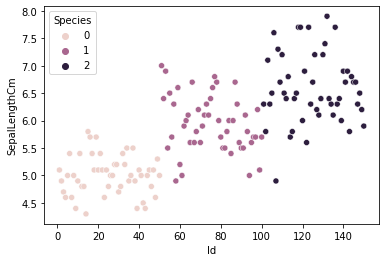

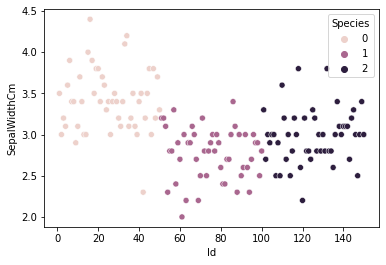

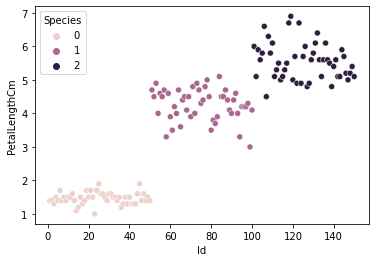

<AxesSubplot:xlabel='Id', ylabel='PetalWidthCm'>

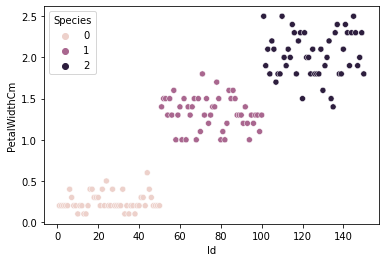

In [6]:
sns.scatterplot(x="Id", y="SepalLengthCm", data=df, hue="Species")
plt.show()
sns.scatterplot(x="Id", y="SepalWidthCm", data=df, hue="Species")
plt.show()
sns.scatterplot(x="Id", y="PetalLengthCm", data=df, hue="Species")
plt.show()
sns.scatterplot(x="Id", y="PetalWidthCm", data=df, hue="Species")

In [7]:
slMean = np.mean(df["SepalLengthCm"])
swMean = np.mean(df["SepalWidthCm"])
plMean = np.mean(df["PetalLengthCm"])
pwMean = np.mean(df["PetalWidthCm"])
slStdDev = np.std(df["SepalLengthCm"])
swStdDev = np.std(df["SepalWidthCm"])
plStdDev = np.std(df["PetalLengthCm"])
pwStdDev = np.std(df["PetalWidthCm"])
print(slMean,swMean,plMean,pwMean,"\n",slStdDev,swStdDev,plStdDev,pwStdDev)
print("Minimum değerler:\n", df.min(),"\nMaximum değerler:\n",df.max())


5.843333333333334 3.0540000000000003 3.758666666666666 1.1986666666666668 
 0.8253012917851409 0.4321465800705435 1.7585291834055212 0.7606126185881716
Minimum değerler:
 SepalLengthCm    4.3
SepalWidthCm     2.0
PetalLengthCm    1.0
PetalWidthCm     0.1
Species          0.0
dtype: float64 
Maximum değerler:
 SepalLengthCm    7.9
SepalWidthCm     4.4
PetalLengthCm    6.9
PetalWidthCm     2.5
Species          2.0
dtype: float64


Şekillere tek tek bakarsak 4 öznitelikte de aynı tür çiçeklerin birbirlerine yakın özellikler gösterdiklerini görebiliriz.
Tüm öznitelikler için min,max,ortalama ve standart sapma değerleri üstte yazıyor.
Burada gözümüze en çok çarpan SepalWidth için standart sapmanın az olması ve türden daha az etkilenmesi, PetalLength için ise durum tam tersi.
Türler için tek tek bu özellikleri incelemek istediğim için alttaki kısımları da yazdım. Burada yaptığım tek şey sub-dataframe'ler oluşturup onların da bu özelliklerini incelemek.

In [8]:
df0 = df[df["Species"] == 0]
df1 = df[df["Species"] == 1]
df2 = df[df["Species"] == 2]

In [9]:
slMean = np.mean(df0["SepalLengthCm"])
swMean = np.mean(df0["SepalWidthCm"])
plMean = np.mean(df0["PetalLengthCm"])
pwMean = np.mean(df0["PetalWidthCm"])
slStdDev = np.std(df0["SepalLengthCm"])
swStdDev = np.std(df0["SepalWidthCm"])
plStdDev = np.std(df0["PetalLengthCm"])
pwStdDev = np.std(df0["PetalWidthCm"])
print(slMean,swMean,plMean,pwMean,"\n",slStdDev,swStdDev,plStdDev,pwStdDev)
print("Minimum değerler:\n", df.min(),"\nMaximum değerler:\n",df.max())

5.006 3.418 1.464 0.244 
 0.3489469873777391 0.37719490982779713 0.17176728442867112 0.10613199329137281
Minimum değerler:
 SepalLengthCm    4.3
SepalWidthCm     2.0
PetalLengthCm    1.0
PetalWidthCm     0.1
Species          0.0
dtype: float64 
Maximum değerler:
 SepalLengthCm    7.9
SepalWidthCm     4.4
PetalLengthCm    6.9
PetalWidthCm     2.5
Species          2.0
dtype: float64


In [10]:
slMean = np.mean(df1["SepalLengthCm"])
swMean = np.mean(df1["SepalWidthCm"])
plMean = np.mean(df1["PetalLengthCm"])
pwMean = np.mean(df1["PetalWidthCm"])
slStdDev = np.std(df1["SepalLengthCm"])
swStdDev = np.std(df1["SepalWidthCm"])
plStdDev = np.std(df1["PetalLengthCm"])
pwStdDev = np.std(df1["PetalWidthCm"])
print(slMean,swMean,plMean,pwMean,"\n",slStdDev,swStdDev,plStdDev,pwStdDev)
print("Minimum değerler:\n", df.min(),"\nMaximum değerler:\n",df.max())

5.936 2.7700000000000005 4.26 1.3259999999999998 
 0.5109833656783751 0.31064449134018135 0.4651881339845203 0.19576516544063705
Minimum değerler:
 SepalLengthCm    4.3
SepalWidthCm     2.0
PetalLengthCm    1.0
PetalWidthCm     0.1
Species          0.0
dtype: float64 
Maximum değerler:
 SepalLengthCm    7.9
SepalWidthCm     4.4
PetalLengthCm    6.9
PetalWidthCm     2.5
Species          2.0
dtype: float64


In [11]:
slMean = np.mean(df2["SepalLengthCm"])
swMean = np.mean(df2["SepalWidthCm"])
plMean = np.mean(df2["PetalLengthCm"])
pwMean = np.mean(df2["PetalWidthCm"])
slStdDev = np.std(df2["SepalLengthCm"])
swStdDev = np.std(df2["SepalWidthCm"])
plStdDev = np.std(df2["PetalLengthCm"])
pwStdDev = np.std(df2["PetalWidthCm"])
print(slMean,swMean,plMean,pwMean,"\n",slStdDev,swStdDev,plStdDev,pwStdDev)
print("Minimum değerler:\n", df.min(),"\nMaximum değerler:\n",df.max())

6.587999999999998 2.974 5.5520000000000005 2.0260000000000002 
 0.6294886813914926 0.3192553836664309 0.546347874526844 0.2718896835115301
Minimum değerler:
 SepalLengthCm    4.3
SepalWidthCm     2.0
PetalLengthCm    1.0
PetalWidthCm     0.1
Species          0.0
dtype: float64 
Maximum değerler:
 SepalLengthCm    7.9
SepalWidthCm     4.4
PetalLengthCm    6.9
PetalWidthCm     2.5
Species          2.0
dtype: float64


Burada 1 ve 2 türleri için yüksek sapmalar görsek de 0. türün üyeleri çoğu özelliklerinde tek tip örüntü gösteriyor.

##Korelasyon Matrisi

<AxesSubplot:>

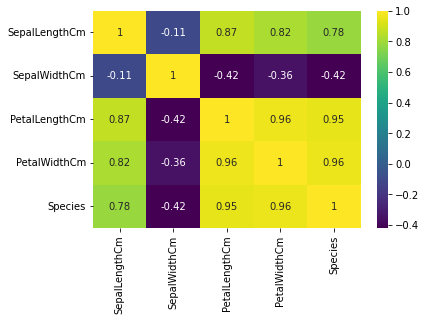

In [12]:
cols = df.corr()
sns.heatmap(cols, annot=True, cmap = 'viridis')

Burada SepalLength ve SepalWidth değerlerinin birbiriyle korelasyonunun az olduğunu, diğer değerlerin ise genellikle korele olduğunu görebiliriz.

# Pairplot
    Burada önceden bahsedilen ilişkiler daha net bir şekilde görülebilmektedir. Veri setinde 0. türün diğer iki türden çoğu özellikte ayrık durması da dikkat çekmektedir.
    

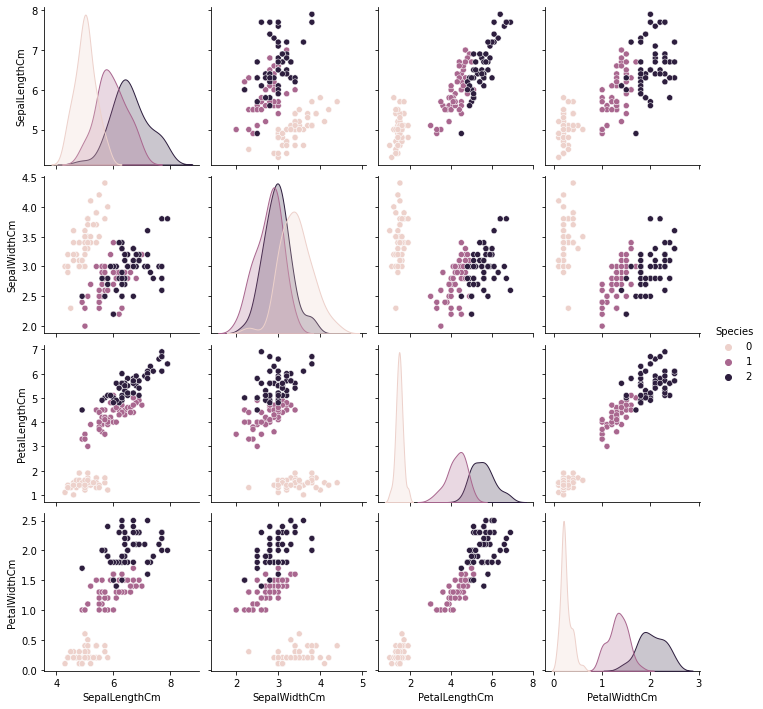

In [13]:
sns.pairplot(df, hue ='Species')

#Training Decision Tree

In [30]:
model = DecisionTreeClassifier(max_depth = 5)
dataList = df.values.tolist()
random.shuffle(dataList) # ödevde ilk %80 demiş ancak böyle yapmanın daha sağlıklı olacağını düşündüm.
X = []
y = []
for row in dataList:
    X.append(row[:4])
    y.append(row[4])
X_train = X[:120]
X_eval = X[120:150]
y_train = y[:120]
y_eval = y[120:150]
model.fit(X_train,y_train)
test_pred_decision_tree = model.predict(X_eval)
train_pred_decision_tree = model.predict(X_train)

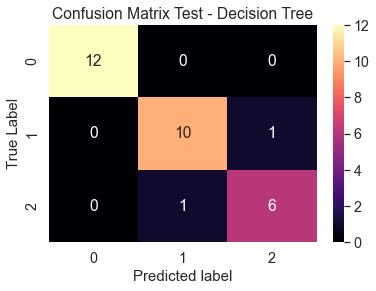

<Figure size 720x504 with 0 Axes>

In [31]:
confusion_matrix_test = metrics.confusion_matrix(y_eval,  

                                            test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix_test)

ax = plt.axes()

sns.set(font_scale=1.3)

plt.figure(figsize=(10,7))

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix Test - Decision Tree')

ax.set_xlabel("Predicted label", fontsize =15)

ax.set_ylabel("True Label", fontsize=15)

plt.show()


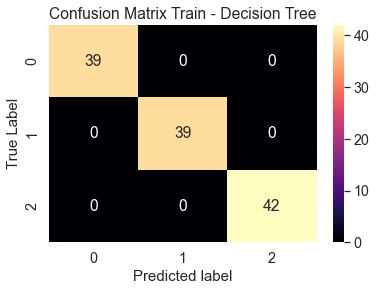

<Figure size 720x504 with 0 Axes>

In [14]:
confusion_matrix_train = metrics.confusion_matrix(y_train,  

                                            train_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix_train)

ax = plt.axes()

sns.set(font_scale=1.3)

plt.figure(figsize=(10,7))

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix Train - Decision Tree')

ax.set_xlabel("Predicted label", fontsize =15)

ax.set_ylabel("True Label", fontsize=15)

plt.show()

Burada confision matrix'ten görebildiğimiz üzere yanlış sınıflandırdığımız iki sample var. Bunun sebebi,
modeldeki tek kısıtın max depth olmasıdır. Split yapmak için minimum sample number gibi bir kısıt koysaydık
modelin overfit etmesini biraz daha engelleyebilirdik.

In [15]:
testAccuracy = metrics.accuracy_score(y_eval,test_pred_decision_tree)
trainAccuracy = metrics.accuracy_score(y_train,train_pred_decision_tree)
print("Train accuracy = {} \n Test accuracy = {}"
      .format(trainAccuracy,testAccuracy))

Train accuracy = 1.0 
 Test accuracy = 0.9333333333333333


In [16]:
average = 'weighted'
testPrecision = metrics.precision_score(y_eval,test_pred_decision_tree
                                       ,average = average)
trainPrecision = metrics.precision_score(y_train,train_pred_decision_tree
                                        ,average = average)
print("Train precision = {} \n Test precision = {}"
      .format(trainPrecision,testPrecision))

Train precision = 1.0 
 Test precision = 0.9466666666666667


In [17]:
average = 'weighted'
testF1 = metrics.f1_score(y_eval,test_pred_decision_tree
                                       ,average = average)
trainF1 = metrics.f1_score(y_train,train_pred_decision_tree
                                        ,average = average)
print("Train f1_score = {} \n Test f1_score = {}"
      .format(trainF1,testF1))

Train f1_score = 1.0 
 Test f1_score = 0.9337037037037036


In [18]:
average = 'weighted'
testRecall = metrics.recall_score(y_eval,test_pred_decision_tree
                                       ,average = average)
trainRecall = metrics.recall_score(y_train,train_pred_decision_tree
                                        ,average = average)
print("Train recall_score = {} \n Test recall_score = {}"
      .format(trainRecall,testRecall))
len(test_pred_decision_tree)


Train recall_score = 1.0 
 Test recall_score = 0.9333333333333333


30

Recall, Accuracy, Precision ve F1 sonuçlarının Train için 1.0 olması modelin overfit ettiğinden şüphelenmeme yol açıyor. Ancak
Test sonuçları da %93 gibi bir başarı gösterdiği için modelimiz başarıyla çalışıyor diyebiliriz.

In [32]:
# Binarize the output
y_eval = label_binarize(y_eval, classes=[0, 1, 2])
test_pred_decision_tree = label_binarize(test_pred_decision_tree, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_eval[:, i], test_pred_decision_tree[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr[average], tpr[average], _ = metrics.roc_curve(y_eval.ravel(), test_pred_decision_tree.ravel())
roc_auc[average] = metrics.auc(fpr[average], tpr[average])

NameError: name 'average' is not defined

In [20]:
fpr[average], tpr[average], _ = metrics.roc_curve(y_eval.ravel(), test_pred_decision_tree.ravel())
roc_auc[average] = metrics.auc(fpr[average], tpr[average])

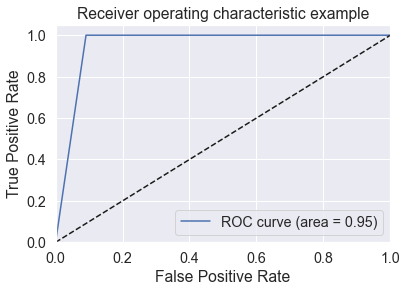

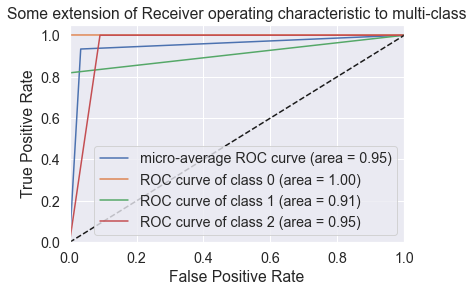

In [21]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr[average], tpr[average],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc[average]))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

ROC Curvelerden görüldüğü üzere model düşük fpr ile yüksek tpr edinmeyi başararak istediğimiz şekilde kullanıma hazır.